# <span style='color:blue'> <center>Data Manipulation with Pandas</center> </span>
## **Chapter 4.** Index Properties
#### by **Ivan Alducin**
<p><img src="https://cdn.datafloq.com/cache/blog_pictures/878x531/what-does-clustering-in-data-mining-mean.jpg" width="1250"</p>

## Usando <b>loc[]</b> y <b>iloc[]</b>
<p>Unas de las propiedades que tienen los DataFrames es la de <code>.loc[]</code> y <code>.iloc[]</code>. las cuales nos sirven para filtrar por medio de un sistema de posición por nombre exacto o por coordenada. Esto nos proporciona una búsqueda más eficiente en algunas circunstancias, a continuación veremos sus propiedades</p>

In [2]:
# Importar pandas
import pandas as pd

# Importar el archivo weather a un DataFrame
weather = pd.read_csv('weather.csv', encoding='latin1', index_col='Day')
weather.head(7)

,Temp,Weather,Wind,Humidity,Barometer,Visibility
Day,,,,,,
Mon,22 °C,Light rain. Mostly cloudy.,2 mph,94.0,"29.95 ""Hg",6 mi
Tue,21 °C,Overcast.,No wind,92.0,"30.39 ""Hg",10 mi
Wed,20 °C,Partly cloudy.,5 mph,89.0,"30.38 ""Hg",10 mi
Thu,25 °C,Partly cloudy.,5 mph,94.0,"29.93 ""Hg",15 mi
Fri,18 °C,Partly cloudy.,5 mph,91.0,"28.36 ""Hg",15 mi
Sat,21 °C,Sunny,4 mph,88.0,"33.30 ""Hg",11 mi
Sun,19 °C,Sunny,6 mph,90.0,"30.38 ""Hg",10 mi


In [92]:
# Filtra la temperatura para el día miercoles, usa .loc[]
weather.loc['Wed', 'Temp']

'20\xa0°C'

In [77]:
# Filtra la temperatura para el día miercoles, usa .iloc[]
weather.iloc[2, 0]

'20\xa0°C'

In [78]:
# Filtra las temperaturas para todos los días, usa .loc[]
weather.loc[:, 'Temp']

Day
Mon    22 °C
Tue    21 °C
Wed    20 °C
Thu    25 °C
Fri    18 °C
Sat    21 °C
Sun    19 °C
Name: Temp, dtype: object

In [79]:
# Filtra las temperaturas para todos los días, usa .iloc[]
weather.iloc[:, 0]

Day
Mon    22 °C
Tue    21 °C
Wed    20 °C
Thu    25 °C
Fri    18 °C
Sat    21 °C
Sun    19 °C
Name: Temp, dtype: object

In [80]:
# Filtra la temperatura para los días jueves y viernes, usa .loc[]
weather.loc[['Thu', 'Fri'], 'Temp']

Day
Thu    25 °C
Fri    18 °C
Name: Temp, dtype: object

In [102]:
# Filtra la temperatura para los días jueves y viernes, usa .iloc[]
weather.iloc[[3,4], 0]

Day
Thu    25 °C
Fri    18 °C
Name: Temp, dtype: object

In [103]:
# Filtra la temperatura y humedad para el día viernes, usa .loc[]
weather.loc['Fri', ['Temp','Humidity']]

Temp        18 °C
Humidity       91
Name: Fri, dtype: object

In [83]:
# Filtra la temperatura y humedad para el día viernes, usa .iloc[]
weather.iloc[4, [0, 3]]

Temp        18 °C
Humidity      91%
Name: Fri, dtype: object

In [84]:
weather.loc['Tue':'Fri', 'Temp':'Humidity']

,Temp,Weather,Wind,Humidity
Day,,,,
Tue,21 °C,Overcast.,No wind,92%
Wed,20 °C,Partly cloudy.,5 mph,89%
Thu,25 °C,Partly cloudy.,5 mph,94%
Fri,18 °C,Partly cloudy.,5 mph,91%


In [85]:
weather.iloc[1:5, 0:4]

,Temp,Weather,Wind,Humidity
Day,,,,
Tue,21 °C,Overcast.,No wind,92%
Wed,20 °C,Partly cloudy.,5 mph,89%
Thu,25 °C,Partly cloudy.,5 mph,94%
Fri,18 °C,Partly cloudy.,5 mph,91%


In [98]:
# Filtra todos los registros con humedad mayor de 90
weather.loc[weather['Humidity'] > 90, :]

,Temp,Weather,Wind,Humidity,Barometer,Visibility
Day,,,,,,
Mon,22 °C,Light rain. Mostly cloudy.,2 mph,94.0,"29.95 ""Hg",6 mi
Tue,21 °C,Overcast.,No wind,92.0,"30.39 ""Hg",10 mi
Thu,25 °C,Partly cloudy.,5 mph,94.0,"29.93 ""Hg",15 mi
Fri,18 °C,Partly cloudy.,5 mph,91.0,"28.36 ""Hg",15 mi


In [100]:
weather.iloc[list(weather['Humidity'] > 90)]

,Temp,Weather,Wind,Humidity,Barometer,Visibility
Day,,,,,,
Mon,22 °C,Light rain. Mostly cloudy.,2 mph,94.0,"29.95 ""Hg",6 mi
Tue,21 °C,Overcast.,No wind,92.0,"30.39 ""Hg",10 mi
Thu,25 °C,Partly cloudy.,5 mph,94.0,"29.93 ""Hg",15 mi
Fri,18 °C,Partly cloudy.,5 mph,91.0,"28.36 ""Hg",15 mi


## Indices
<p>La librería de <code>pandas</code> nos permite definir columnas como indices (<i>index</i>), esto si no se hace desde la carga directa del <i>DataFrame</i> como lo vimos en el ejemplo anterior. La ventaja de esto es que nos permite tener mayor flexibilidad para definir y/o remover indices.</p>

In [17]:
# Importar el archivo csv temperatures a un DataFrame (La temperatura esta en Fahrenheit)
df = pd.read_csv('city_temperature.csv')
df.head()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [21]:
# Convierte a grados Celsius
df['AvgTemperatureC'] = (df['AvgTemperature'] - 32) * (5/9)

In [116]:
# Definir el campo de ciudad como indice
df_ind = df.set_index('Country')
df_ind.head()

,Region,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC
Country,,,,,,,,
Algeria,Africa,NaN,Algiers,1,1,1995,64.2,17.888889
Algeria,Africa,NaN,Algiers,1,2,1995,49.4,9.666667
Algeria,Africa,NaN,Algiers,1,3,1995,48.8,9.333333
Algeria,Africa,NaN,Algiers,1,4,1995,46.4,8.000000
Algeria,Africa,NaN,Algiers,1,5,1995,47.9,8.833333


In [94]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2906327 entries, Algeria to US
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Region           object 
 1   State            object 
 2   City             object 
 3   Month            int64  
 4   Day              int64  
 5   Year             int64  
 6   AvgTemperature   float64
 7   AvgTemperatureC  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 199.6+ MB


In [95]:
# Resetea el indice
df_ind.reset_index(inplace=True, drop=True)
df_ind.head()

,Region,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC
0,Africa,NaN,Algiers,1,1,1995,64.2,17.888889
1,Africa,NaN,Algiers,1,2,1995,49.4,9.666667
2,Africa,NaN,Algiers,1,3,1995,48.8,9.333333
3,Africa,NaN,Algiers,1,4,1995,46.4,8.000000
4,Africa,NaN,Algiers,1,5,1995,47.9,8.833333


## Filtrando con .loc[]
<p>La característica principal de los índices es <code>.loc[]</code> una propiedad que acepta valores de tipo índice. Cuando se le pasa un solo argumento, tomará un subconjunto de filas.</p>

In [96]:
cities = ["Mexico City", "Monterrey"]

# Filtrar las filas que contengan la lista de ciudades, usa corchetes
df[df['City'].isin(cities)]

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC
1212930,North America,Mexico,NaN,Mexico City,1,1,1995,57.7,14.277778
1212931,North America,Mexico,NaN,Mexico City,1,2,1995,56.1,13.388889
1212932,North America,Mexico,NaN,Mexico City,1,3,1995,57.6,14.222222
1212933,North America,Mexico,NaN,Mexico City,1,4,1995,57.3,14.055556
1212934,North America,Mexico,NaN,Mexico City,1,5,1995,58.8,14.888889
...,...,...,...,...,...,...,...,...,...
1231455,North America,Mexico,NaN,Monterrey,5,8,2020,81.6,27.555556
1231456,North America,Mexico,NaN,Monterrey,5,9,2020,70.9,21.611111
1231457,North America,Mexico,NaN,Monterrey,5,10,2020,69.6,20.888889
1231458,North America,Mexico,NaN,Monterrey,5,11,2020,75.0,23.888889


In [97]:
# Indexa por ciudad el DataFrame
df_ind = df.set_index('City')

# Filtrar las filas que contengan la lista de ciudades, usa .loc[]
df_ind.loc[cities]

,Region,Country,State,Month,Day,Year,AvgTemperature,AvgTemperatureC
City,,,,,,,,
Mexico City,North America,Mexico,NaN,1,1,1995,57.7,14.277778
Mexico City,North America,Mexico,NaN,1,2,1995,56.1,13.388889
Mexico City,North America,Mexico,NaN,1,3,1995,57.6,14.222222
Mexico City,North America,Mexico,NaN,1,4,1995,57.3,14.055556
Mexico City,North America,Mexico,NaN,1,5,1995,58.8,14.888889
...,...,...,...,...,...,...,...,...
Monterrey,North America,Mexico,NaN,5,8,2020,81.6,27.555556
Monterrey,North America,Mexico,NaN,5,9,2020,70.9,21.611111
Monterrey,North America,Mexico,NaN,5,10,2020,69.6,20.888889


In [5]:
# Crea un indice compuesto por los campos país y ciudad
df_ind = df.set_index(["Country", "City"])

# Crea una lista de tuplas (país, ciudad): Mexico, Mexico City & US, Chicago
rows_to_keep = [("Mexico", "Mexico City"), ("US", "Chicago")]

# Filtra las filas que contengan los valores dentro de la lista
df_ind.loc[rows_to_keep]

Region     State  Month  Day  Year  \
Country City                                                     
Mexico  Mexico City  North America       NaN      1    1  1995   
        Mexico City  North America       NaN      1    2  1995   
        Mexico City  North America       NaN      1    3  1995   
        Mexico City  North America       NaN      1    4  1995   
        Mexico City  North America       NaN      1    5  1995   
...                            ...       ...    ...  ...   ...   
US      Chicago      North America  Illinois      5    9  2020   
        Chicago      North America  Illinois      5   10  2020   
        Chicago      North America  Illinois      5   11  2020   
        Chicago      North America  Illinois      5   12  2020   
        Chicago      North America  Illinois      5   13  2020   

                     AvgTemperature  AvgTemperatureC  
Country City                                          
Mexico  Mexico City            57.7        14.277778  
        Mexico City            56.1        13.388889  
        Mexico City            57.6        14.222222  
        Mexico City            57.3        14.055556  
        Mexico City            58.8        14.888889  
...                             ...              ...  
US      Chicago                42.3         5.722222  
        Chicago                49.6         9.777778  
        Chicago                43.3         6.277778  
        Chicago                50.3        10.166667  
        Chicago                46.6         8.111111  

[18530 rows x 7 columns]

In [41]:
# Ordena el DataFrame por el indice que creaste en el apartado anterior
df_ind.sort_index()
df_ind

Region                   State  Month  \
Country City                                                                 
Algeria Algiers                      Africa                     NaN      1   
        Algiers                      Africa                     NaN      1   
        Algiers                      Africa                     NaN      1   
        Algiers                      Africa                     NaN      1   
        Algiers                      Africa                     NaN      1   
...                                     ...                     ...    ...   
US      San Juan Puerto Rico  North America  Additional Territories      7   
        San Juan Puerto Rico  North America  Additional Territories      7   
        San Juan Puerto Rico  North America  Additional Territories      7   
        San Juan Puerto Rico  North America  Additional Territories      7   
        San Juan Puerto Rico  North America  Additional Territories      7   

                              Day  Year  AvgTemperature  
Country City                                             
Algeria Algiers                 1  1995            64.2  
        Algiers                 2  1995            49.4  
        Algiers                 3  1995            48.8  
        Algiers                 4  1995            46.4  
        Algiers                 5  1995            47.9  
...                           ...   ...             ...  
US      San Juan Puerto Rico   27  2013            82.4  
        San Juan Puerto Rico   28  2013            81.6  
        San Juan Puerto Rico   29  2013            84.2  
        San Juan Puerto Rico   30  2013            83.8  
        San Juan Puerto Rico   31  2013            83.6  

[2906327 rows x 6 columns]

## Slicing
<p>El término <i>slicing</i> se refiere a seleccionar elementos consecutivos de un objeto usando la sintaxis <code>first:last</code>  Los DataFrames se pueden dividir por valores de índice o por número de fila / columna; comenzaremos con el primer caso. Esto implica filtrar dentro del método <code>.loc[]</code>.</p>

In [15]:
df['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  0],
      dtype=int64)

In [19]:
# Agrega una columna de Fecha creada a partir de las columnas Año, Mes y Dia
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Region          object        
 1   Country         object        
 2   State           object        
 3   City            object        
 4   Month           int64         
 5   Day             int64         
 6   Year            int64         
 7   AvgTemperature  float64       
 8   Date            datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 199.6+ MB


In [101]:
# Usa condiciones de tipo boolean para filtrar todo lo que se encuentre entre 2018 y 2020
temp_bool = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2020-12-31')]

# Resultado
temp_bool

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC,Date
8402,Africa,Algeria,NaN,Algiers,1,1,2018,58.1,14.500000,2018-01-01
8403,Africa,Algeria,NaN,Algiers,1,2,2018,55.9,13.277778,2018-01-02
8404,Africa,Algeria,NaN,Algiers,1,3,2018,55.1,12.833333,2018-01-03
8405,Africa,Algeria,NaN,Algiers,1,4,2018,-99.0,-72.777778,2018-01-04
8406,Africa,Algeria,NaN,Algiers,1,5,2018,53.1,11.722222,2018-01-05
...,...,...,...,...,...,...,...,...,...,...
2899535,North America,US,Wyoming,Cheyenne,5,9,2020,42.3,5.722222,2020-05-09
2899536,North America,US,Wyoming,Cheyenne,5,10,2020,43.1,6.166667,2020-05-10
2899537,North America,US,Wyoming,Cheyenne,5,11,2020,37.8,3.222222,2020-05-11
2899538,North America,US,Wyoming,Cheyenne,5,12,2020,41.9,5.500000,2020-05-12


In [102]:
# Usar la fecha como indice y ordenarla
df_ind = df.set_index('Date').sort_index()

In [103]:
# Usa .loc[] para filtrar todo lo que se encuentre entre 2018 y 2020
df_ind.loc['2018-01-01':'2020-12-31']

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC
Date,,,,,,,,,
2018-01-01,Asia,Philippines,NaN,Manila,1,1,2018,80.4,26.888889
2018-01-01,North America,US,Kentucky,Paducah,1,1,2018,9.8,-12.333333
2018-01-01,North America,US,Georgia,Savannah,1,1,2018,36.0,2.222222
2018-01-01,North America,US,Ohio,Dayton,1,1,2018,-0.3,-17.944444
2018-01-01,North America,US,New York,New York City,1,1,2018,12.6,-10.777778
...,...,...,...,...,...,...,...,...,...
2020-05-13,North America,US,Texas,Brownsville,5,13,2020,80.0,26.666667
2020-05-13,North America,US,Florida,Miami Beach,5,13,2020,77.4,25.222222
2020-05-13,North America,US,Alabama,Birmingham,5,13,2020,64.7,18.166667


In [104]:
# Usa .loc[] para filtrar todo lo que se encuentre entre Ago 2017 a May 2019
df_ind.loc['2017-08-01':'2019-05-31']

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC
Date,,,,,,,,,
2017-08-01,North America,US,Ohio,Cleveland,8,1,2017,76.5,24.722222
2017-08-01,Africa,Gambia,NaN,Banjul,8,1,2017,81.2,27.333333
2017-08-01,North America,US,Washington,Seattle,8,1,2017,74.5,23.611111
2017-08-01,Middle East,Lebanon,NaN,Beirut,8,1,2017,84.7,29.277778
2017-08-01,North America,US,Florida,West Palm Beach,8,1,2017,78.2,25.666667
...,...,...,...,...,...,...,...,...,...
2019-05-31,Asia,Japan,NaN,Tokyo,5,31,2019,71.0,21.666667
2019-05-31,North America,US,California,Fresno,5,31,2019,74.2,23.444444
2019-05-31,Asia,Japan,NaN,Sapporo,5,31,2019,58.6,14.777778


## Temperatura a través del tiempo
<p>Es interesante ver cómo cambian las temperaturas de cada ciudad con el tiempo si miramos la variación mensual tendremos como resultado una tabla grande, sobre la cual puede ser difícil razonar. Por esa razón, vamos a analizar cómo cambian las temperaturas cada año.

Podemos acceder a los componentes de un campo fecha (año, mes, día) usando el código de la forma <code>dataframe["column"].dt.component</code>, por ejemplo, si queremos obtener el mes sería de la siguiente forma <code>dataframe["column"].dt.month</code>, para obtener el año tenemos <code>dataframe["column"].dt.year</code>
    
Una vez que se obtiene la columna del año, podemos crear una tabla dinámica con los datos agregados por ciudad y año
</p>

In [23]:
# Imaginemos que solo tenemos la columna de Fecha, sin el desglose de Año-Mes-Dia
df.drop(df[['Year', 'Month', 'Day']], axis=1)

# Agregar la columna de año al DataFrame
df['Year'] = df['Date'].dt.year

# Pivotea la temperatura por país y ciudad por año
pivot = df.pivot_table(values='AvgTemperatureC', index=['Region', 'Country', 'City'], columns='Year')

# Resultado
pivot.head()

Year                                            1995.0     1996.0     1997.0  \
Region Country                  City                                           
Africa Algeria                  Algiers      17.508371  17.023376  18.292390   
       Benin                    Cotonou      22.924201  25.546903  25.253272   
       Burundi                  Bujumbura     5.392542 -25.440043 -41.720091   
       Central African Republic Bangui        3.349924  -2.207043  -6.733333   
       Congo                    Brazzaville  20.857382  20.788707 -26.842922   

Year                                            1998.0     1999.0     2000.0  \
Region Country                  City                                           
Africa Algeria                  Algiers      16.576408  18.041400  17.879326   
       Benin                    Cotonou       3.107763  23.531659  11.796752   
       Burundi                  Bujumbura   -71.949467 -72.509285 -72.777778   
       Central African Republic Bangui        9.139878  15.054947  20.359290   
       Congo                    Brazzaville -14.982192  20.888432  18.542653   

Year                                            2001.0     2002.0     2003.0  \
Region Country                  City                                           
Africa Algeria                  Algiers      18.149924  16.859817  18.357078   
       Benin                    Cotonou      26.974886  25.789802  23.837900   
       Burundi                  Bujumbura   -72.777778 -72.777778 -72.503349   
       Central African Republic Bangui       23.924049  22.932725  22.206545   
       Congo                    Brazzaville  24.180974  23.321157  25.774886   

Year                                            2004.0  ...     2011.0  \
Region Country                  City                    ...              
Africa Algeria                  Algiers      17.826351  ...  18.311568   
       Benin                    Cotonou      27.379781  ...  27.211111   
       Burundi                  Bujumbura   -60.782332  ...        NaN   
       Central African Republic Bangui       23.578931  ...  26.243988   
       Congo                    Brazzaville  25.201730  ...  25.488432   

Year                                            2012.0     2013.0     2014.0  \
Region Country                  City                                           
Africa Algeria                  Algiers      17.939132  17.613699  18.442161   
       Benin                    Cotonou      27.340923  27.282801  26.470167   
       Burundi                  Bujumbura          NaN        NaN        NaN   
       Central African Republic Bangui       26.166970  25.710046  24.087215   
       Congo                    Brazzaville  25.387826  25.503805  24.776256   

Year                                            2015.0     2016.0     2017.0  \
Region Country                  City                                           
Africa Algeria                  Algiers      17.804341  17.508956  18.331050   
       Benin                    Cotonou      26.985732  26.776715  27.863014   
       Burundi                  Bujumbura          NaN        NaN        NaN   
       Central African Republic Bangui       22.911961  25.188980  26.312024   
       Congo                    Brazzaville  25.110504  24.867183  25.721766   

Year                                            2018.0     2019.0     2020.0  
Region Country                  City                                          
Africa Algeria                  Algiers      16.767123  16.831659  14.463516  
       Benin                    Cotonou      25.962100  26.349924  28.783997  
       Burundi                  Bujumbura          NaN        NaN        NaN  
       Central African Republic Bangui       24.473212  17.140335  27.451907  
       Congo                    Brazzaville  24.766819  24.535160  27.281119  

[5 rows x 26 columns]

In [39]:
# Filtra las temperaturas solo para México, para el periodo de 2005 a 2020.
mex = pivot.loc['Mexico', 2005:2020]
mex

Year,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
City,,,,,,,,,,,,,,,,
Guadalajara,-33.768037,-43.755464,-34.426685,NaN,NaN,-35.666211,3.875959,10.887671,7.857468,6.220097,-0.176230,6.261991,12.848858,11.120219,17.235616,13.742272
Mexico City,17.305327,16.601065,16.439574,15.836066,17.163775,17.076104,17.521613,17.132817,17.440639,16.881583,16.825440,16.332423,17.391020,16.120244,16.641857,18.434837
Monterrey,24.481126,24.996043,23.564231,23.437917,24.585693,23.489193,24.373973,24.392380,22.986910,22.363775,21.743473,22.465847,23.644444,21.297412,21.665601,21.072682


In [40]:
# Obten la temperatura media por año
print(mex.mean())

Year
2005.0     2.672806
2006.0    -0.719452
2007.0     1.859040
2008.0    19.636991
2009.0    20.874734
2010.0     1.633029
2011.0    15.257182
2012.0    17.470956
2013.0    16.095006
2014.0    15.155152
2015.0    12.797561
2016.0    15.020087
2017.0    17.961441
2018.0    16.179292
2019.0    18.514358
2020.0    17.749930
dtype: float64


In [115]:
# Obten el año con la temperatura media más alta por año
print(mex.max())

Year
2005.0    24.481126
2006.0    24.996043
2007.0    23.564231
2008.0    23.437917
2009.0    24.585693
2010.0    23.489193
2011.0    24.373973
2012.0    24.392380
2013.0    22.986910
2014.0    22.363775
2015.0    21.743473
2016.0    22.465847
2017.0    23.644444
2018.0    21.297412
2019.0    21.665601
2020.0    21.072682
dtype: float64


In [42]:
# Obten la temperatura media por ciudad
temp_mean = mex.mean(axis=1)
temp_mean

City
Guadalajara    -4.124462
Mexico City    16.946524
Monterrey      23.160044
dtype: float64

In [116]:
# Obten la ciudad con la ciudad con la temperatura media más baja
temp_mean[temp_mean == temp_mean.min()]

City
Guadalajara   -4.124462
dtype: float64

In [83]:
# Filtra las ciudades de Mexico y Monterrey
rows_to_keep = ['Mexico City', 'Monterrey']

mex_mty = pivot.loc[rows_to_keep, 2005:2020]
mex_mty

Year                                  2005.0                                   \
Month                                     1          2          3          4    
Region        Country City                                                      
North America Mexico  Mexico City  13.654122  15.708333  18.240143  20.279630   
                      Monterrey    18.431900  16.771825  22.473118  25.590741   

Year                                                                           \
Month                                     5          6          7          8    
Region        Country City                                                      
North America Mexico  Mexico City  19.612903  20.694444  18.449821  17.727599   
                      Monterrey    27.218638  31.922222  31.060932  30.324373   

Year                                                     ...     2019.0  \
Month                                     9          10  ...         8    
Region        Country City                               ...              
North America Mexico  Mexico City  17.457407  16.503584  ...  18.892473   
                      Monterrey    29.664815  23.365591  ...  31.213262   

Year                                                                           \
Month                                     9          10         11         12   
Region        Country City                                                      
North America Mexico  Mexico City  18.320370  17.971326  17.175926  15.222222   
                      Monterrey    26.803704  23.682796  18.181481  17.353047   

Year                                  2020.0                                   \
Month                                     1          2          3          4    
Region        Country City                                                      
North America Mexico  Mexico City  15.121864  17.471264  19.892473  21.266667   
                      Monterrey    16.885305  16.898467  23.534050  24.800000   

Year                                          
Month                                     5   
Region        Country City                    
North America Mexico  Mexico City  18.476852  
                      Monterrey    26.300926  

[2 rows x 185 columns]

In [106]:
mex_mty.iloc[0]

Year    Month
2005.0  1        13.654122
        2        15.708333
        3        18.240143
        4        20.279630
        5        19.612903
                   ...    
2020.0  1        15.121864
        2        17.471264
        3        19.892473
        4        21.266667
        5        18.476852
Name: (North America, Mexico, Mexico City), Length: 185, dtype: float64

<AxesSubplot:xlabel='Year,Month'>

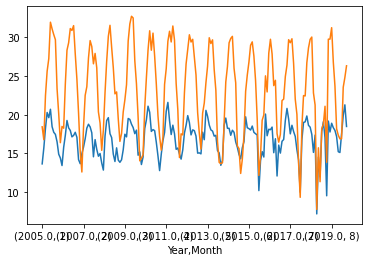

In [113]:
# Crea una gráfica de linea para comparar la tendencia de temperatura entre Mexico y Monterrey
mex_mty.iloc[0].plot(kind='line')
mex_mty.iloc[1].plot(kind='line')

In [ ]:
# Haz el mismo ejercicio agregando la variable de meses (Para observar la estacionalidad de la temperatura a través de los años)
